In [1]:
# load libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# load train data set
df=pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# print shape of dataset with rows and columns
print("The data have {} rows and {} columns".format(df.shape[0],df.shape[1]))

The data have 1000 rows and 40 columns


# Data Cleaning

In [4]:
# In this dataset missing values have been detected by '?'
# We are replacing '?' with nan

df=df.replace('?',np.nan)

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
# List of columns not necessary for prediction
cols_to_drop=['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_date', 'incident_state', 
              'incident_city', 'incident_location', 'insured_hobbies', 'auto_make', 'auto_model', 'auto_year','_c39']

# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

# No. of rows and columns left after droping some unnecessary columns
print("The data have {} rows and {} columns after droping unnecessary columns".format(df.shape[0],df.shape[1]))

The data have 1000 rows and 27 columns after droping unnecessary columns


# Missing values

In [7]:
# checking missing values
df.isnull().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

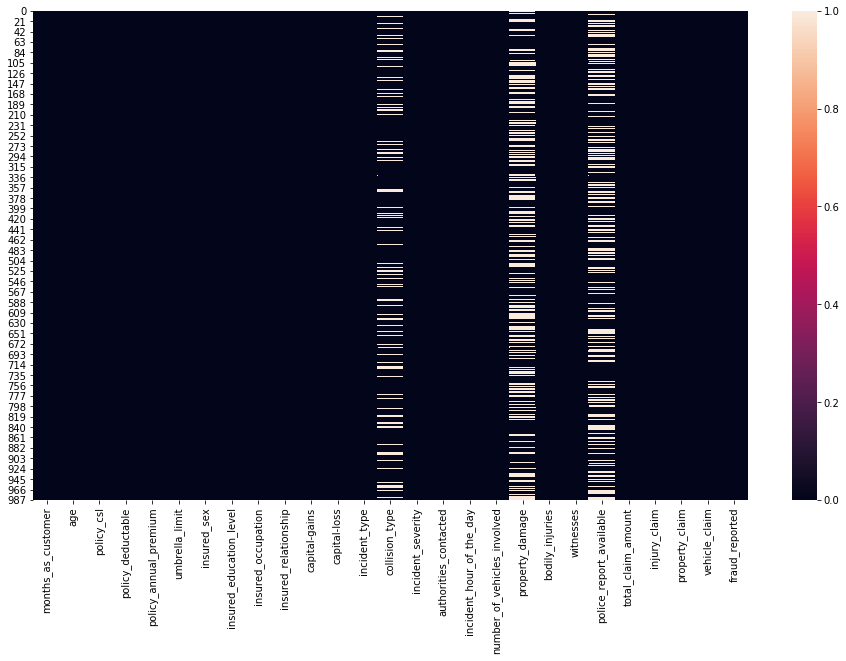

In [8]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()

In [9]:
# percent of missing value each column containing
# 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]

# 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature," have ",np.round(df[feature].isnull().sum()/df.shape[0]*100, 4),  ' % missing values')

collision_type  have  17.8  % missing values
property_damage  have  36.0  % missing values
police_report_available  have  34.3  % missing values


# Data types

In [10]:
# checking number of categorical and numerical columns
df.dtypes.value_counts()

int64      14
object     12
float64     1
dtype: int64

Categorical Features

In [11]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# import the categorical imputer
from sklearn_pandas import CategoricalImputer # put mode in null values
imputer=CategoricalImputer()

df['collision_type']=imputer.fit_transform(df['collision_type'])
df['property_damage']=imputer.fit_transform(df['property_damage'])
df['police_report_available']=imputer.fit_transform(df['police_report_available'])

In [12]:
# Extracting the categorical columns
cat_features=df.select_dtypes(include=['O']).copy()

In [84]:
cat_features.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [85]:
cat_features.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [87]:
# checking the no. of unique value each categorical feature have
for feature in cat_features:
    print(feature,'have',df[feature].nunique(),'unique values these are: \n',df[feature].unique(),'\n')

policy_csl have 3 unique values these are: 
 ['250/500' '100/300' '500/1000'] 

insured_sex have 2 unique values these are: 
 ['MALE' 'FEMALE'] 

insured_education_level have 7 unique values these are: 
 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD'] 

insured_occupation have 14 unique values these are: 
 ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing'] 

insured_relationship have 6 unique values these are: 
 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family'] 

incident_type have 4 unique values these are: 
 ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car'] 

collision_type have 3 unique values these are: 
 ['Side Collision' 'Rear Collision' 'Front Collision'] 

incident_severity have 4 unique values these are: 
 ['Major Dama

In [87]:
# custom maping for encoding
cat_features['policy_csl']=cat_features['policy_csl'].map({'100/300':1,'250/500':2.5,'500/1000':5})
cat_features['insured_sex']=cat_features['insured_sex'].map({'FEMALE':0,'MALE':1})
cat_features['insured_education_level']=cat_features['insured_education_level'].map({'JD':1,'High School':2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_features['incident_severity']=cat_features['incident_severity'].map({'Trivial Damage':1, 'Minor Damage':2,'Major Damage':3, 'Total Loss':4})
cat_features['property_damage']=cat_features['property_damage'].map({'YES':1,'NO':0})
cat_features['police_report_available']=cat_features['police_report_available'].map({'YES':1,'NO':0})
cat_features['fraud_reported']=cat_features['fraud_reported'].map({'Y':1,'N':0})

In [88]:
# Create dummies of remaining categorical features
for feature in cat_features.drop(columns=['policy_csl', 'insured_sex', 'insured_education_level', 'incident_severity', 'property_damage', 'police_report_available', 'fraud_reported']).columns:
    cat_features=pd.get_dummies(cat_features,columns=[feature],prefix=[feature],drop_first=True)

In [90]:
cat_features.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


Numerical Features

In [12]:
# Extracting the categorical columns
num_features=df.select_dtypes(include=np.number).copy()

In [13]:
num_features.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [95]:
# Creating new features from existing features
num_features['customer']=df['months_as_customer'].apply(lambda x: 1 if x<=24 else 0) # new customer=1 , old customer=0
num_features['Customer_age_group']=df['age'].apply(lambda x: 1 if x<=30 else 0) # 1 for age less than 31 else 0
num_features['have_umbrella_limit']=df['umbrella_limit'].apply(lambda x: 0 if x>0 else 1)
num_features['vehicle_involved']=df['number_of_vehicles_involved'].apply( lambda x: 1 if x<=1 else 0)

Concatenate Numerical & Categorical features

In [101]:
final_df=pd.concat([num_features,cat_features],axis=1)

In [103]:
final_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,customer,Customer_age_group,have_umbrella_limit,vehicle_involved,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,0,0,1,1,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,0,0,0,1,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,0,1,0,0,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,0,0,0,1,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,0,0,0,1,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


# Data visualisation

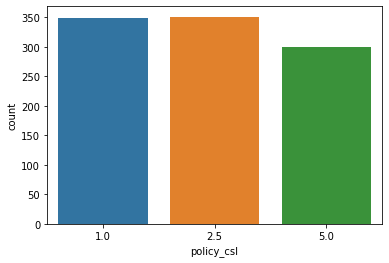

In [104]:
# we'll look at the distribution of data in some columns now

sns.countplot(final_df['policy_csl'])
plt.show()

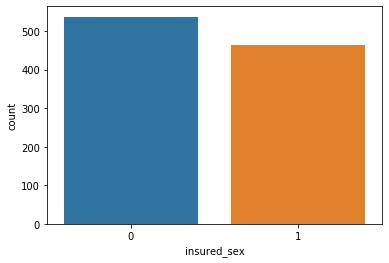

In [106]:
sns.countplot(final_df['insured_sex'])
plt.show()

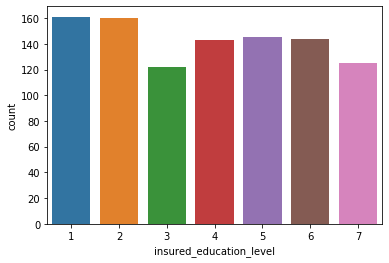

In [108]:
sns.countplot(final_df['insured_education_level'])
plt.show()

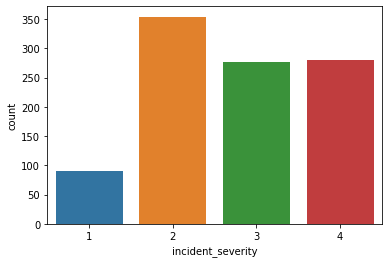

In [110]:
sns.countplot(final_df['incident_severity'])
plt.show()

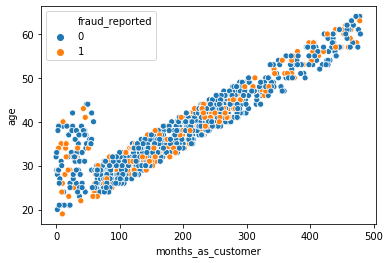

In [113]:
sns.scatterplot(final_df['months_as_customer'],final_df['age'], hue=final_df['fraud_reported'])
plt.show()

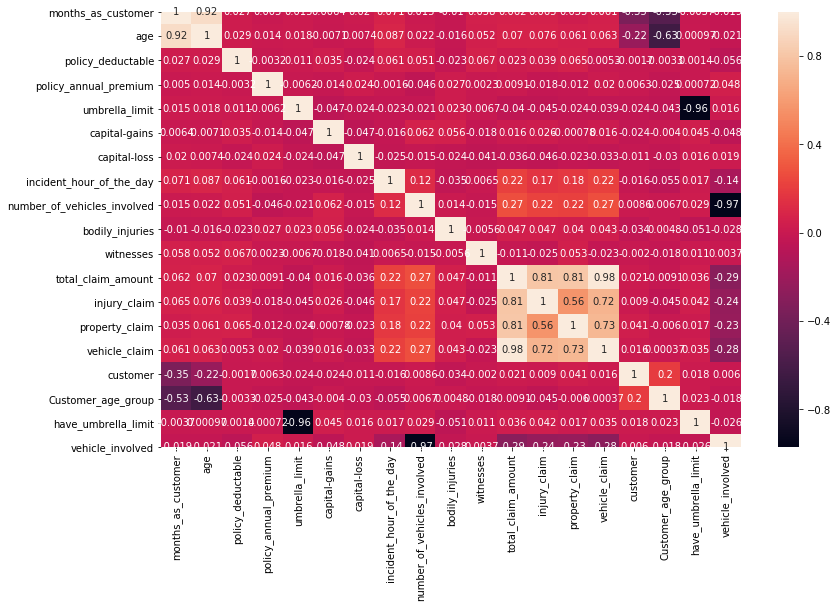

In [115]:
plt.figure(figsize=(13,8))
sns.heatmap(num_features.corr(),annot=True)
plt.show()

In [117]:
final_df[['total_claim_amount','injury_claim','property_claim','vehicle_claim','fraud_reported']].corr()

,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
total_claim_amount,1.000000,0.805025,0.810686,0.982773,0.163651
injury_claim,0.805025,1.000000,0.563866,0.722878,0.090975
property_claim,0.810686,0.563866,1.000000,0.732090,0.137835
vehicle_claim,0.982773,0.722878,0.732090,1.000000,0.170049
fraud_reported,0.163651,0.090975,0.137835,0.170049,1.000000


In [118]:
final_df[['umbrella_limit','have_umbrella_limit','fraud_reported']].corr()

,umbrella_limit,have_umbrella_limit,fraud_reported
umbrella_limit,1.000000,-0.957052,0.058622
have_umbrella_limit,-0.957052,1.000000,-0.059903
fraud_reported,0.058622,-0.059903,1.000000


In [119]:
final_df[['number_of_vehicles_involved','vehicle_involved','months_as_customer','customer','Customer_age_group','age','fraud_reported']].corr()

,number_of_vehicles_involved,vehicle_involved,months_as_customer,customer,Customer_age_group,age,fraud_reported
number_of_vehicles_involved,1.000000,-0.970146,0.014736,0.008626,0.006708,0.022102,0.051839
vehicle_involved,-0.970146,1.000000,-0.018871,0.006042,-0.017616,-0.020807,-0.049378
months_as_customer,0.014736,-0.018871,1.000000,-0.351233,-0.528349,0.922098,0.020544
customer,0.008626,0.006042,-0.351233,1.000000,0.197115,-0.223089,0.041915
Customer_age_group,0.006708,-0.017616,-0.528349,0.197115,1.000000,-0.631818,-0.015502
age,0.022102,-0.020807,0.922098,-0.223089,-0.631818,1.000000,0.012143
fraud_reported,0.051839,-0.049378,0.020544,0.041915,-0.015502,0.012143,1.000000


# Drop autocorrelated columns

In [120]:
final_df.drop(columns=['total_claim_amount','injury_claim','property_claim','umbrella_limit','vehicle_involved','months_as_customer','age'],inplace=True)
num_features.drop(columns=['total_claim_amount','injury_claim','property_claim','umbrella_limit','vehicle_involved','months_as_customer','age'],inplace=True)

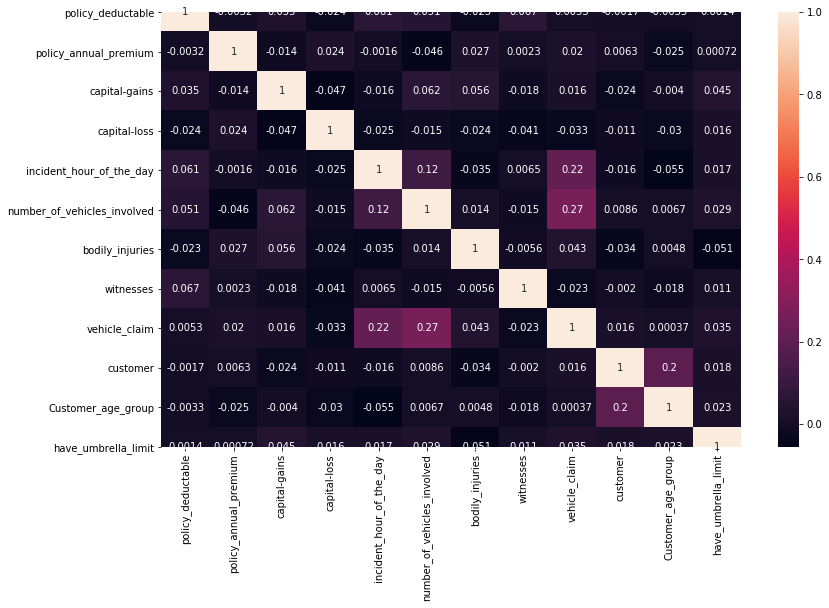

In [123]:
# After droping autocorrelated features
plt.figure(figsize=(13,8))
sns.heatmap(num_features.corr(),annot=True)
plt.show()

In [125]:
final_df.to_csv('experiment1.csv',index=False)